# ÖDEV 3 
# MEHMET ALTINTAŞ 1901022065

# ÖN HAZIRLIK KODLARI

# Ayrık-zamanlı Fourier dönüşümü (DTFT)

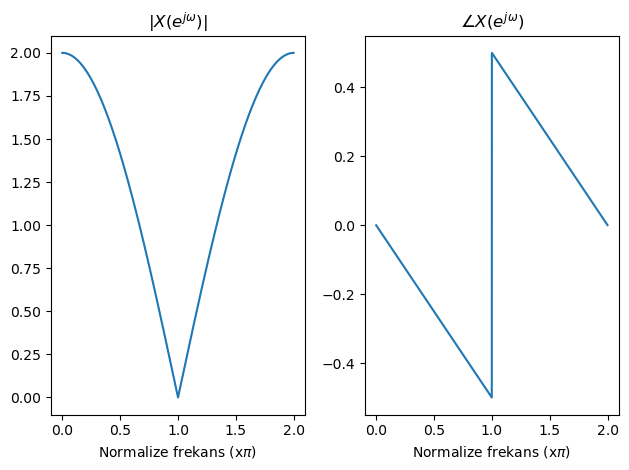

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
w_cont   = np.arange(0, 2*np.pi, np.pi/1000)
X_abs    = np.abs(2*np.cos(w_cont/2))
X_phase  = np.array([-w/2 if w < np.pi else -w/2 + np.pi for w in w_cont])
plt.subplot(121)
plt.plot(w_cont/np.pi, X_abs)
plt.title(r'$|X(e^{j\omega})|$')
plt.xlabel(r'Normalize frekans (x$\pi$)')
plt.subplot(122)
plt.plot(w_cont/np.pi, X_phase/np.pi)
plt.title(r'$\angle X(e^{j\omega})$')
plt.xlabel(r'Normalize frekans (x$\pi$)')
plt.tight_layout()
plt.show()

# Ayrık Fourier dönüşümü (DFT)

In [15]:
def dirac(n):
    if n==0:
        return 1
    else:
        return 0


In [17]:
N=8
X_k = np.zeros([N],dtype=complex)
for k in range(N):
    for n in range(N):
        X_k[k] = X_k[k] + (dirac(n) + dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)


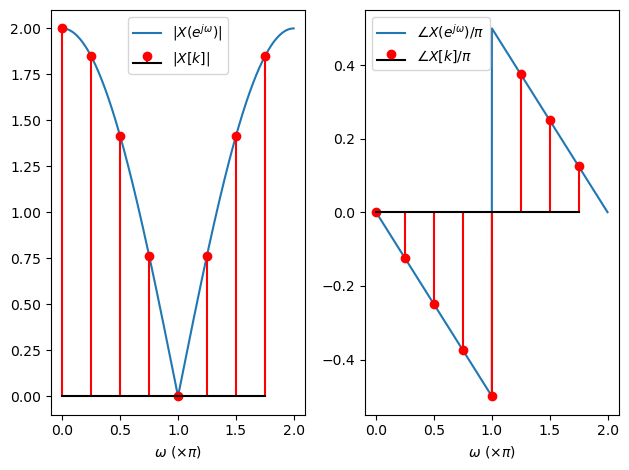

In [23]:
import numpy as np
import matplotlib.pyplot as plt

w_cont = np.arange(0, 2*np.pi, np.pi/1000)
X_abs    = np.abs(2*np.cos(w_cont/2))
X_phase  = np.array([-w/2 if w < np.pi else -w/2 + np.pi for w in w_cont])

w_discrete   = np.arange(0, N)*(2*np.pi/N)
X_k_abs      = np.abs(X_k)
X_k_phase    = np.angle(X_k)

plt.figure()

plt.subplot(121)
plt.plot(w_cont/np.pi, X_abs,     label=r'$|X(e^{j\omega})|$')
plt.stem(w_discrete/np.pi, X_k_abs, linefmt='r-', markerfmt='ro',
         basefmt='k-', label=r'$|X[k]|$')
plt.xlabel(r'$\omega$ (×$\pi$)')
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi, X_phase/np.pi,    label=r'$\angle X(e^{j\omega})/\pi$')
plt.stem(w_discrete/np.pi, X_k_phase/np.pi, linefmt='r-', markerfmt='ro',
         basefmt='k-', label=r'$\angle X[k]/\pi$')
plt.xlabel(r'$\omega$ (×$\pi$)')
plt.legend()
plt.tight_layout()
plt.show()


# Hızlı Fourier Dönüşümü (FFT)

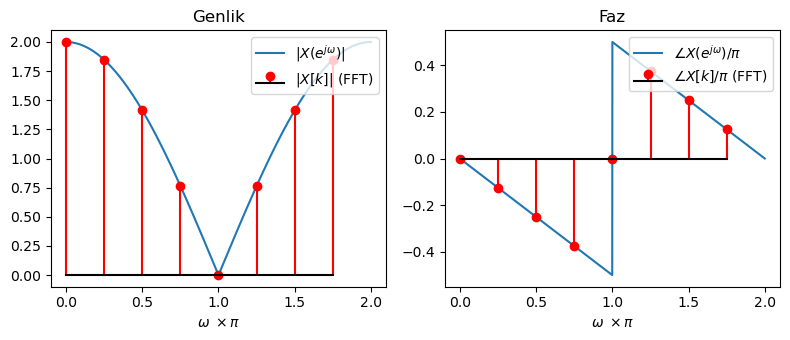

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# 1) İşaret ve parametre tanımları
x = np.array([1, 1])   # iki örnekten oluşan sinyal
N = 8                  # FFT noktası

# 2) Sürekli frekans için DTFT yaklaşık hesabı
w_cont        = np.arange(0, 2*np.pi, np.pi/1000)
X_abs_cont    = np.abs(2*np.cos(w_cont/2))
X_phase_cont  = np.array([-w/2 if w < np.pi else -w/2 + np.pi for w in w_cont])

# 3) Ayrık FFT hesabı
fft_X         = fft(x, N)
abs_fft_X     = np.abs(fft_X)
phase_fft_X   = np.angle(fft_X)

# 4) Grafikleri çiz
plt.figure(figsize=(8, 3.5))

# ———————————————————————————————
# Genlik Karşılaştırması
plt.subplot(121)
plt.plot(w_cont/np.pi, X_abs_cont, 
         label=r'$|X(e^{j\omega})|$')               # raw string ile π/ω kaçışsız
w_discrete = np.arange(N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi, abs_fft_X, 
         linefmt='r-', markerfmt='ro', basefmt='k-', 
         label=r'$|X[k]|\ \mathrm{(FFT)}$')
plt.xlabel(r'$\omega\;\times\pi$')
plt.legend(loc='upper right')
plt.title('Genlik')

# ———————————————————————————————
# Faz Karşılaştırması
plt.subplot(122)
plt.plot(w_cont/np.pi, X_phase_cont/np.pi, 
         label=r'$\angle X(e^{j\omega})/\pi$')
plt.stem(w_discrete/np.pi, phase_fft_X/np.pi, 
         linefmt='r-', markerfmt='ro', basefmt='k-', 
         label=r'$\angle X[k]/\pi\ \mathrm{(FFT)}$')
plt.xlabel(r'$\omega\;\times\pi$')
plt.legend(loc='upper right')
plt.title('Faz')

plt.tight_layout()
plt.show()


# Frekansta örnekleme →Zamanda periyodiklik ilişkisi

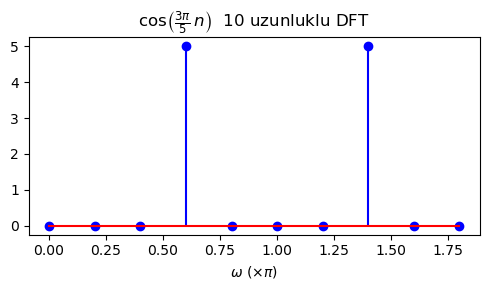

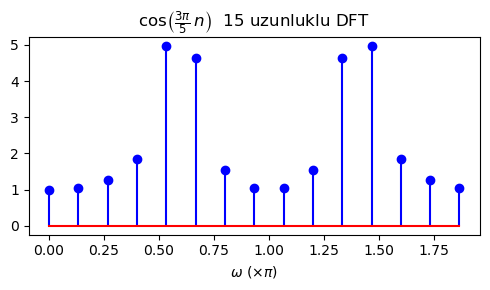

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft

# 10 noktalı DFT giriş sinyali
n1       = np.arange(0, 10)
x1       = np.cos(3*np.pi/5 * n1)
X1_abs   = np.abs(fft(x1))
w_disc_1 = n1 * 2*np.pi / len(n1)

plt.figure(figsize=(5, 3))

plt.stem(w_disc_1/np.pi, X1_abs, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel(r'$\omega\ (\times\pi)$')
plt.title(r'$\cos\!\left(\frac{3\pi}{5}\,n\right)$  10 uzunluklu DFT')

plt.tight_layout()
plt.show()

n2       = np.arange(0, 15)
x2       = np.cos(3*np.pi/5 * n2)
X2_abs   = np.abs(fft(x2))
w_disc_2 = n2 * 2*np.pi / len(n2)

plt.figure(figsize=(5, 3))

plt.stem(w_disc_2/np.pi, X2_abs, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel(r'$\omega\ (\times\pi)$')
plt.title(r'$\cos\!\left(\frac{3\pi}{5}\,n\right)$  15 uzunluklu DFT')

plt.tight_layout()
plt.show()


# DFT genlik ve faz grafiklerinden işaret sentezi

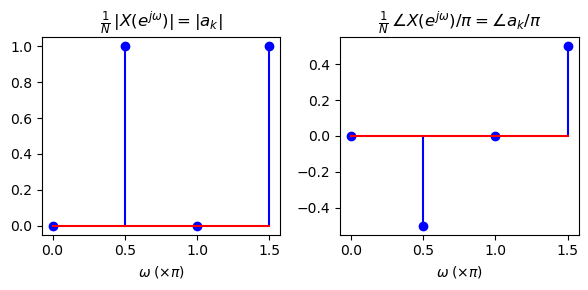

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft

# Sinyal tanımı
x      = np.array([0, 2, 0, -2])
N      = len(x)
n      = np.arange(N)
w_disc = n * 2*np.pi / N

# DFT ve normalizasyon
X_norm   = fft(x) / N
X_abs    = np.abs(X_norm)
X_phase  = np.angle(X_norm)

plt.figure(figsize=(6, 3))

# Genlik
plt.subplot(121)
plt.stem(w_disc/np.pi, X_abs,
         linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel(r'$\omega\;(\times\pi)$')
plt.title(r'$\frac{1}{N}\,|X(e^{j\omega})| = |a_k|$')

# Faz
plt.subplot(122)
plt.stem(w_disc/np.pi, X_phase/np.pi,
         linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel(r'$\omega\;(\times\pi)$')
plt.title(r'$\frac{1}{N}\,\angle X(e^{j\omega})/\pi = \angle a_k/\pi$')

plt.tight_layout()
plt.show()


# BASAMAK, DÜRTÜ İŞARETLERİNİN KOLAYCA OLUŞTURULMASI

In [104]:
n = np.arange(-20,21)

#yol-1
u_n = np.array([0 if i < 0 else 1 for i in n])

#yol-2
u_n = []
for i in n:
    if i<0:
        u_n.append(0)
    else:
        u_n.append(1)
        
#yol-3(bu yol önerilmemektedir)
u_n = np.concatenate((np.zeros(20),np.ones(21)))

#yol-4
u_n=np.ones(len(n))
u_n[n<0]=0

In [49]:
#u[n-3]
n = np.arange(-20,21)
u_n_3 = np.array([0 if i<3 else 1 for i in n])

#dirac(n)
n = np.arange(-20,21)
dirac = np.array([0 if i!=0 else 1 for i in n])

# dirac(n+2)
n = np.arange(-20,21)
dirac_n_arti_2 = np.array([0 if i!=-2 else 1 for i in n])

#u[n] - u[n-10]
n = np.arange(-20,21)
u_n_eksi_u_n_10 = np.array([0 if i>=0 and i<10 else 0 for i in n])

## Ön hazırlık ödevleri (ÖDEV-3 başlığı altındaki soruların çözümleri aşağıda verilecek)

# SORU 1

## SORU 1 - a 

## $X(e^{jw}) = \sum_{n=-\infty}^\infty x[n] e^{-jwn}$ 

## Verilen ayrık zamanlı fourier seri açılımı görülmektedir. Bu formül $ h[n] = \delta [n] - \delta [n - 1] $ için uyarlandığında

#
### $H(e^{jw}) = \sum_{n=-\infty}^\infty h[n] e^{-jwn} \Rightarrow(Linearity)\Rightarrow H(e^{jw}) = \sum_{n=-\infty}^\infty \delta[n] e^{-jwn} - \sum_{n=-\infty}^\infty \delta[n - 1] e^{-jwn}$ 


# $ H(e^{jw})  = \mathtt{1 - e^{-jw}}$

# $ 1 = (e^{-jw/2}) * (e^{+jw/2})$
# $ e^{-jw} = (e^{-jw/2}) * (e^{-jw/2}) $

# $ 1 - e^{-jw} = (e^{-jw/2}) * (e^{+jw/2}) - (e^{-jw/2}) * (e^{-jw/2}) $
# $ = (e^{-jw/2})[ (e^{+jw/2}) - (e^{-jw/2}) ] = 2j(e^{-jw/2})\frac{[ (e^{+jw/2}) - (e^{-jw/2}) ]}{2j} $ 

# $ = 2j(e^{-jw/2})sin (\frac {\omega}{2}) = 2e^{j(\frac{-w +\pi }{2})}sin( \frac {\omega} {2}) $

# $ H(e^{jw}) = \mathtt{2e^{j(\frac{-w +\pi }{2})}sin( \frac {\omega} {2})} $ 

# Dolayısıyla

# => $ ∣ H(e^{jw})  ∣ $  = $ 2  ∣ sin(\frac {\omega} {2}) $
# => $ ∠H(e^{jw})$ = $ -\frac {\omega} {2} $ + $ \frac {\pi} {2} $

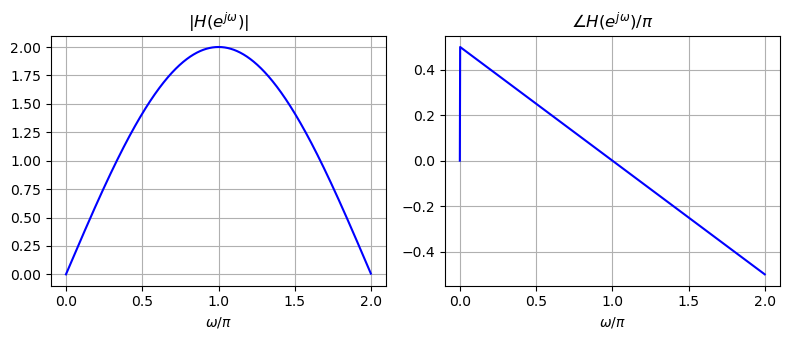

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# frekans ekseni
omega = np.linspace(0, 2*np.pi, 1000, endpoint=False)

# H(e^{jω}) ve bileşenleri
H     = 1 - np.exp(-1j*omega)
H_abs = np.abs(H)
H_ph  = np.angle(H)

plt.figure(figsize=(8,3.5))

plt.subplot(121)
plt.plot(omega/np.pi, H_abs, 'b-')
plt.title(r'$|H(e^{j\omega})|$')
plt.xlabel(r'$\omega/\pi$')
plt.grid(True)

plt.subplot(122)
plt.plot(omega/np.pi, H_ph/np.pi, 'b-')
plt.title(r'$\angle H(e^{j\omega})/\pi$')
plt.xlabel(r'$\omega/\pi$')
plt.grid(True)

plt.tight_layout()
plt.show()


## SORU 1 - b

# ω=0'da sıfır (ideal duraklatma),  ω=π'de maksimumdır.
# Yani düşük frekansları bastırır, yüksek frekansları geçirir: yüksek geçiren karakteristikte filtredir.

## SORU 1 - c 

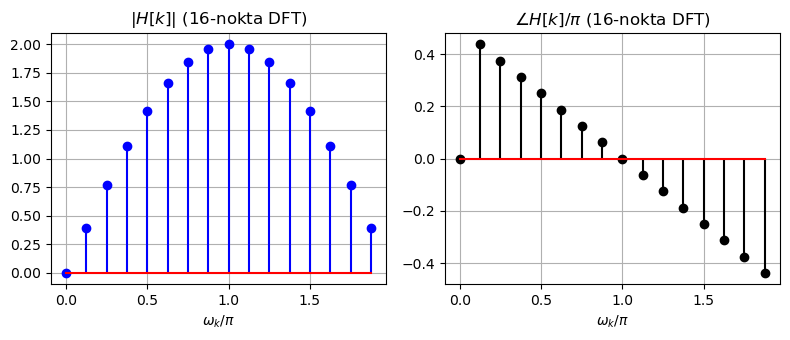

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# (1) h[n] dizisi
N = 16
h = np.zeros(N)
h[0] =  1
h[1] = -1

# (2) 16-noktalı DFT
Hk     = np.fft.fft(h, N)
Hk_abs = np.abs(Hk)
Hk_ph  = np.angle(Hk)

# (3) ayrık frekans vektörü
k      = np.arange(N)
omega_k = 2*np.pi * k / N

# (4) Grafik
plt.figure(figsize=(8,3.5))

plt.subplot(121)
plt.stem(omega_k/np.pi, Hk_abs,
         linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title(r'$|H[k]|$ (16-nokta DFT)')
plt.xlabel(r'$\omega_k/\pi$')
plt.grid(True)

plt.subplot(122)
plt.stem(omega_k/np.pi, Hk_ph/np.pi,
         linefmt='k-', markerfmt='ko', basefmt='r-')
plt.title(r'$\angle H[k]/\pi$ (16-nokta DFT)')
plt.xlabel(r'$\omega_k/\pi$')
plt.grid(True)

plt.tight_layout()
plt.show()
